In [89]:
import pandas as pd  # xử lý dữ liệu
import matplotlib.pyplot as plt  # trực quan hóa dữ liệu
import numpy as np  # tính toán số học

In [117]:
df = pd.read_csv('dataset.csv', encoding='utf-8')
df.head(3)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.300000e+09,220833.0,12.305162
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2.580000e+09,107500.0,11.585246


In [118]:
df.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia,USD,log_price
count,24019.000000,24019.000000,6529.000000,24019.000000,2.401900e+04,2.401900e+04,24019.000000
mean,71.638943,2.049877,10.987594,1.751946,2.840117e+09,1.183382e+05,11.354806
std,30.631627,0.740393,7.378406,0.606200,7.788500e+09,3.245208e+05,0.992961
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06,4.200000e+01,3.737670
25%,56.000000,2.000000,5.000000,1.000000,1.630000e+09,6.791700e+04,11.126042
50%,68.000000,2.000000,9.000000,2.000000,2.270000e+09,9.458300e+04,11.457233
75%,80.000000,2.000000,16.000000,2.000000,3.300000e+09,1.375000e+05,11.831379
max,500.000000,11.000000,70.000000,7.000000,9.800000e+11,4.083333e+07,17.525009


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  object 
 2   TinhTrangBDS      24017 non-null  object 
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        6865 non-null   object 
 6   SoTang            6529 non-null   float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  object 
 9   GiayTo            18286 non-null  object 
 10  MaCanHo           3281 non-null   object 
 11  TinhTrangNoiThat  12420 non-null  object 
 12  HuongCuaChinh     9167 non-null   object 
 13  HuongBanCong      8502 non-null   object 
 14  DacDiem           5431 non-null   object 
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

In [120]:
#Chuyển dữ liệu chữ về dạng số
from sklearn.preprocessing import LabelEncoder
# Sử dụng cùng một LabelEncoder cho nhiều cột có thể gây lỗi tiềm ẩn vì fit_transform() làm "học" lại mỗi lần và ghi đè thông tin trước đó.
# Nên tạo encoder riêng cho từng cột để tránh nhầm lẫn:
df['TinhTrangBDS'] = LabelEncoder().fit_transform(df['TinhTrangBDS'])
df['Quan'] = LabelEncoder().fit_transform(df['Quan'])
df['Loai'] = LabelEncoder().fit_transform(df['Loai'])
df['GiayTo'] = LabelEncoder().fit_transform(df['GiayTo'])
df['TinhTrangNoiThat'] = LabelEncoder().fit_transform(df['TinhTrangNoiThat'])
df['HuongCuaChinh'] = LabelEncoder().fit_transform(df['HuongCuaChinh'])
df['HuongBanCong'] = LabelEncoder().fit_transform(df['HuongBanCong'])
df['DacDiem'] = LabelEncoder().fit_transform(df['DacDiem'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  int64  
 2   TinhTrangBDS      24019 non-null  int64  
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        6865 non-null   object 
 6   SoTang            6529 non-null   float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  int64  
 9   GiayTo            24019 non-null  int64  
 10  MaCanHo           3281 non-null   object 
 11  TinhTrangNoiThat  24019 non-null  int64  
 12  HuongCuaChinh     24019 non-null  int64  
 13  HuongBanCong      24019 non-null  int64  
 14  DacDiem           24019 non-null  int64  
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

In [121]:
# Điền dữ liệu khuyết
df.fillna({"TenPhanKhu":0}, inplace=True)
df.fillna({"MaCanHo": 0 }, inplace=True)
df.fillna({"PhongTam": 0 }, inplace=True)
df.fillna({"SoTang": 0 }, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  int64  
 2   TinhTrangBDS      24019 non-null  int64  
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        24019 non-null  object 
 6   SoTang            24019 non-null  float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  int64  
 9   GiayTo            24019 non-null  int64  
 10  MaCanHo           24019 non-null  object 
 11  TinhTrangNoiThat  24019 non-null  int64  
 12  HuongCuaChinh     24019 non-null  int64  
 13  HuongBanCong      24019 non-null  int64  
 14  DacDiem           24019 non-null  int64  
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

In [122]:
#Xóa bỏ dữ liệu thừa
df = df.drop(['USD', 'log_price', 'DiaChi', 'TenPhanKhu', 'MaCanHo'], axis=1)
df.head(5)

,Quan,TinhTrangBDS,DienTich,Phongngu,SoTang,PhongTam,Loai,GiayTo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,13,1,62.0,2.0,0.0,2.0,2,2,4,8,8,1,2.000000e+09
1,13,1,95.0,3.0,0.0,2.0,2,1,2,8,8,0,5.300000e+09
2,17,0,75.0,2.0,5.0,2.0,2,0,4,7,7,1,2.580000e+09
3,21,1,70.0,1.0,7.0,1.0,2,1,2,7,3,1,4.000000e+09
4,12,1,83.0,2.0,0.0,2.0,2,2,2,3,8,1,2.950000e+09


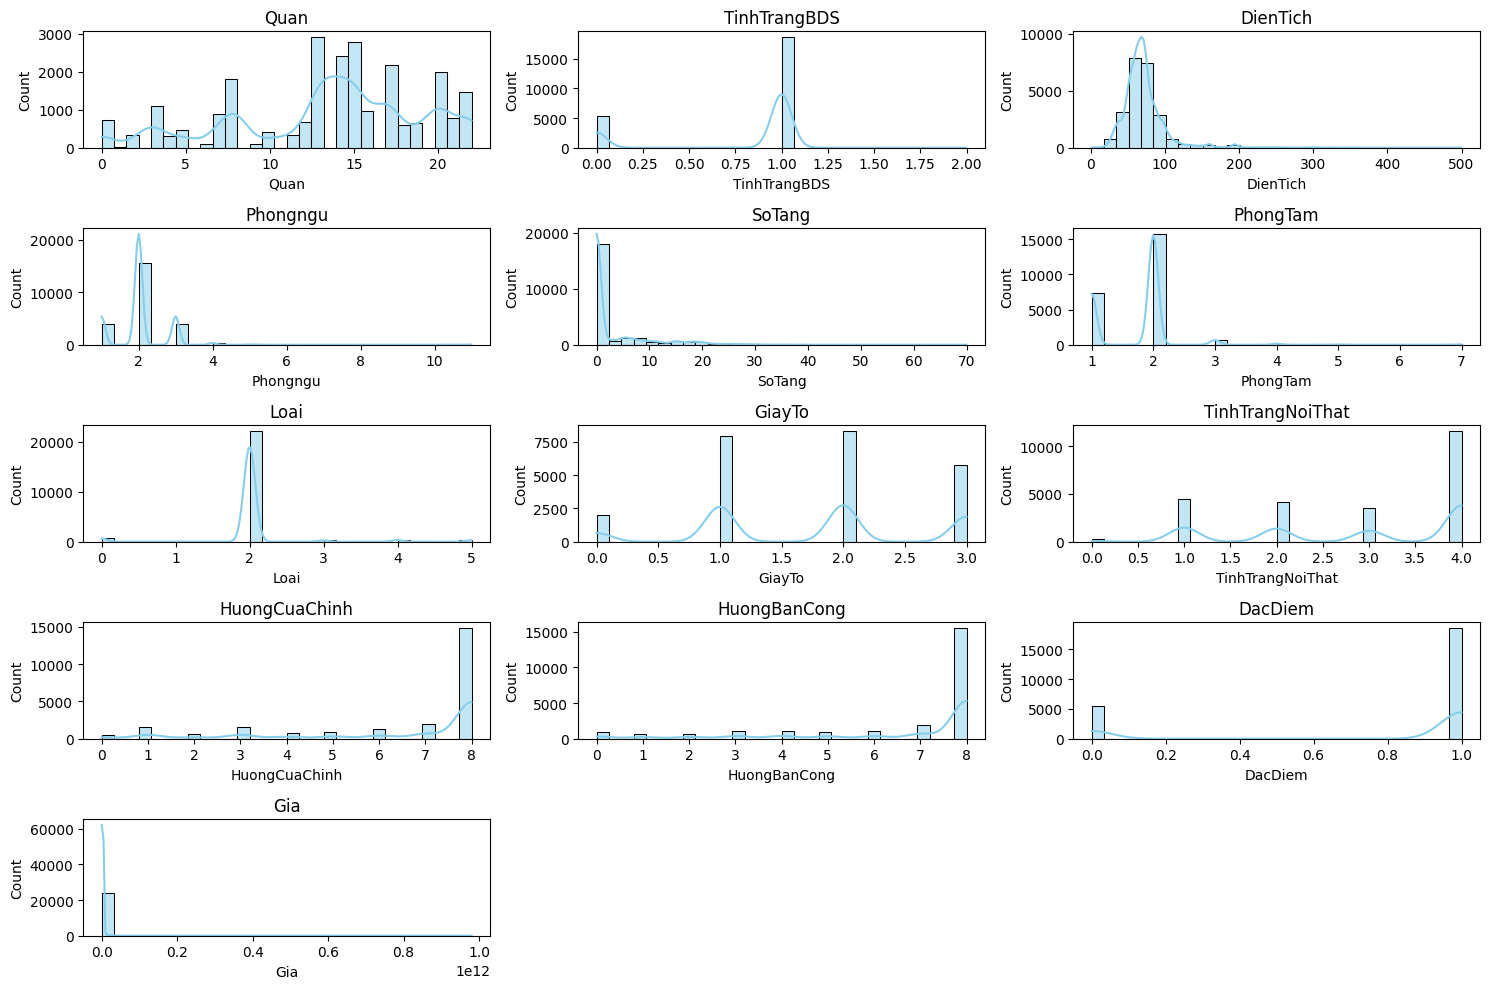

In [133]:
# Vẽ biểu đồ histogram với từng biến
import seaborn as sns
import matplotlib.pyplot as plt  # trực quan hóa dữ liệu
num_columns = df.select_dtypes(include=['number']).columns  # Chỉ chọn cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(5, 3, i)  # Chỉnh kích thước lưới hiển thị
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

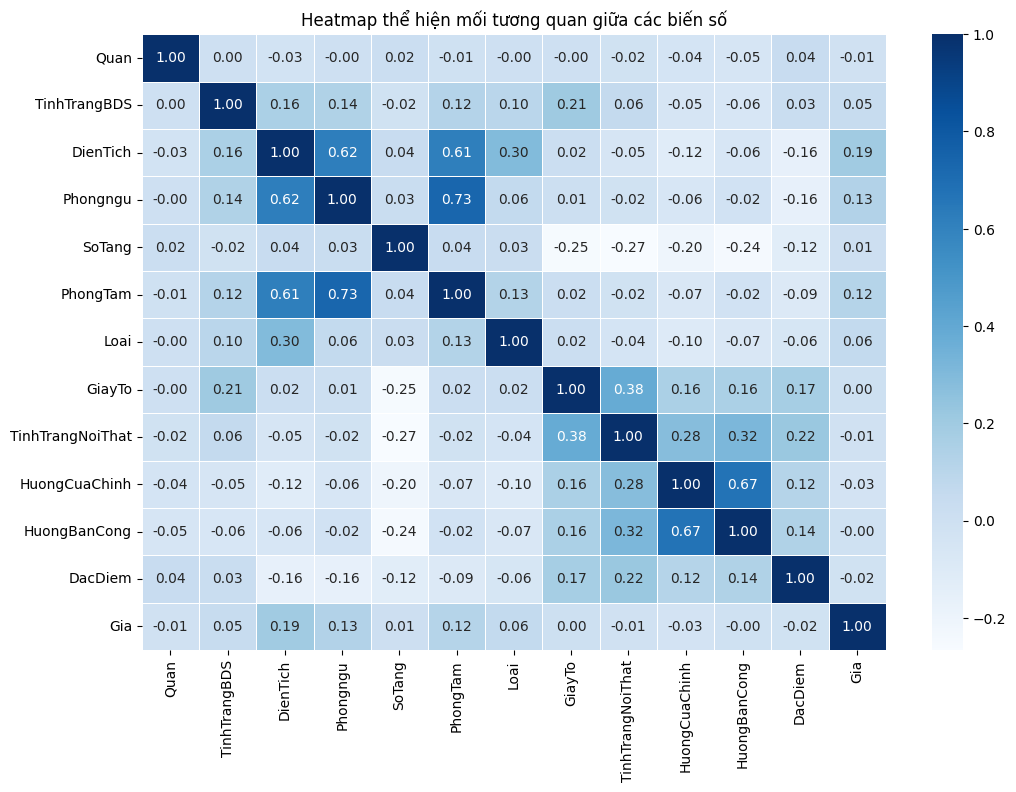

In [134]:
# Vẽ heatmap thể hiện mối quan hệ giữa các biến số
plt.figure(figsize=(12, 8))
corr_matrix = df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Heatmap thể hiện mối tương quan giữa các biến số")
plt.show()

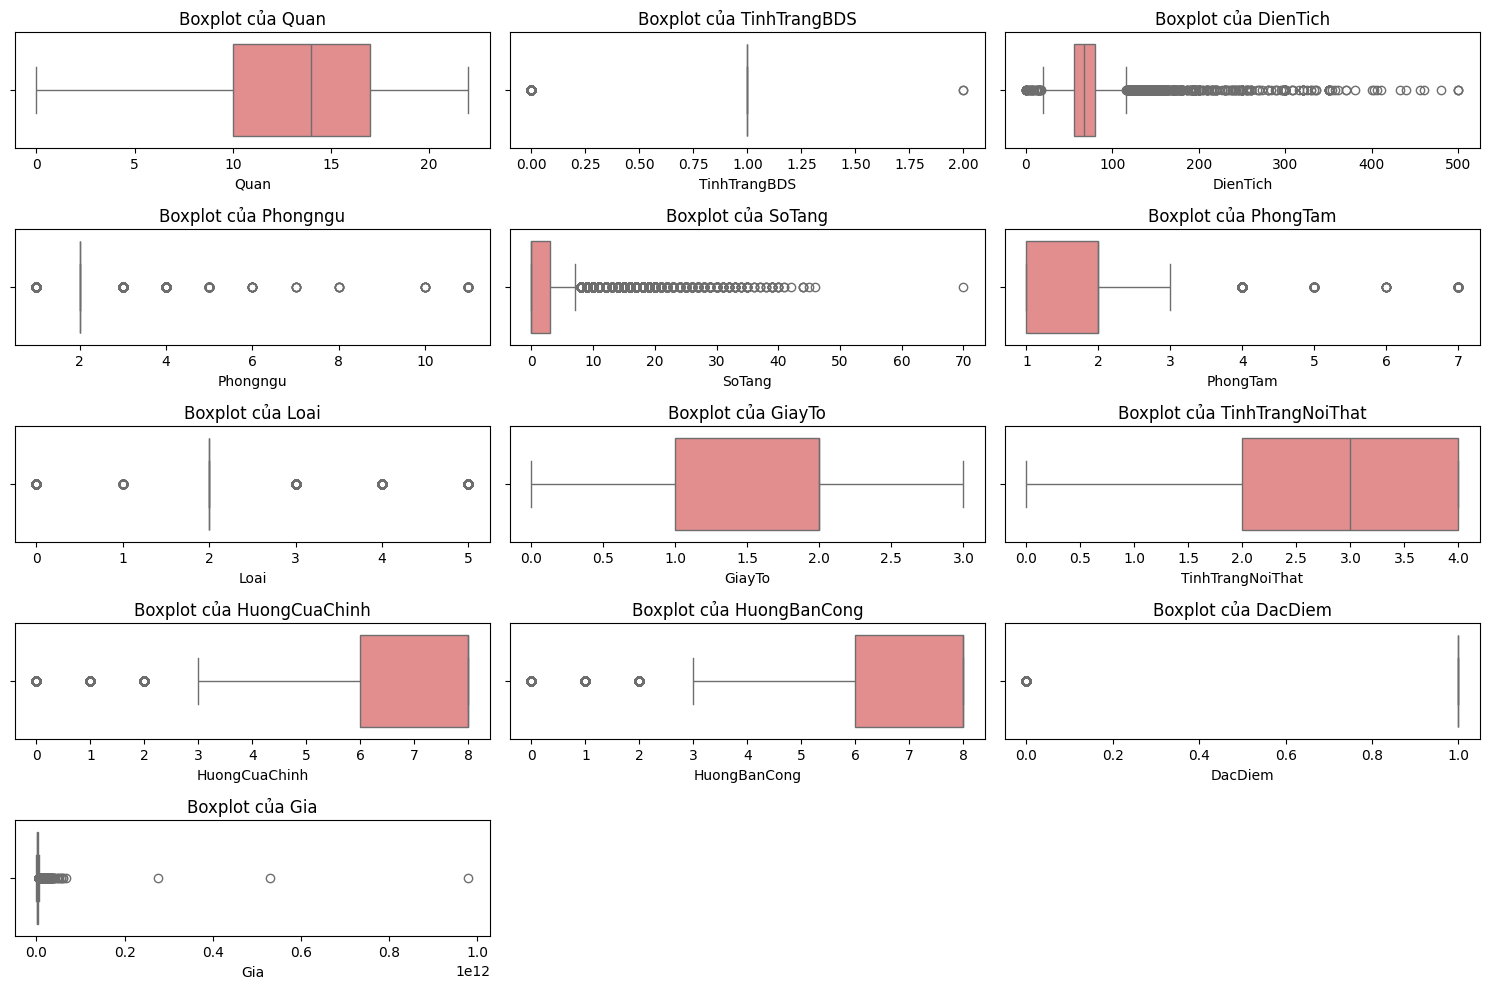

In [136]:
# Vẽ boxplot để phát hiện outliers
num_columns = df.select_dtypes(include=['number']).columns  # Chỉ chọn cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot của {col}')

plt.tight_layout()
plt.show()

In [187]:
#Chia tập dữ liệu
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Gia'])
y = df['Gia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [188]:
df.corr()['Gia'].sort_values(ascending=False)

,Gia
Gia,1.000000
DienTich,0.194862
Phongngu,0.130633
PhongTam,0.118073
Loai,0.061282
TinhTrangBDS,0.045091
SoTang,0.010152
GiayTo,0.002019
HuongBanCong,-0.004634
Quan,-0.008950


In [189]:
X = df.drop(columns=['DacDiem','HuongCuaChinh','TinhTrangNoiThat','Quan','HuongBanCong','Loai','TinhTrangBDS','SoTang','GiayTo'],axis = 1)
y = df['Gia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [190]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
coefs.append(ridge.coef_)
y_pred=ridge.predict(X_test)
#Đánh giá mô hình
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.2622235467967112e-06
MSE: 2.3913516544055923e-12
R2 Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.80026e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


**CẢI THIỆN MÔ HÌNH**

**TÌM KIẾM GIÁ TRỊ PHẠT PHÙ HỢP**

In [191]:
# Tìm kiếm tham số tốt nhất cho mô hình

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# defining parameter range
param_grid = {'ridge__alpha': [0.1, 1, 10, 1000000000000]}
pipeline = Pipeline([
    ('ridge', Ridge())
])


grid = GridSearchCV(pipeline, param_grid,cv = 5,n_jobs=12, scoring='r2',verbose= 2, refit= True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.79846e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Pipeline(steps=[('ridge', Ridge())]), n_jobs=12,
             param_grid={'ridge__alpha': [0.1, 1, 10, 1000000000000]},
             scoring='r2', verbose=2)

**ĐÁNH GIÁ LẠI MÔ HÌNH**

In [192]:
print(grid.best_params_)
y_pred=grid.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

{'ridge__alpha': 0.1}
MAE: 1.3933060036792776e-06
MSE: 1.0962310493261117e-11
R2 Score: 1.0


In [193]:
from sklearn.preprocessing import StandardScaler

# defining parameter range
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])


grid = GridSearchCV(pipeline, param_grid,cv = 5,n_jobs=12, scoring='r2',verbose= 2, refit= True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=12,
             param_grid={'ridge__alpha': [0.1, 1, 10, 1000000000000]},
             scoring='r2', verbose=2)

In [194]:
print(grid.best_params_)
y_pred=grid.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

{'ridge__alpha': 0.1}
MAE: 7509.156546134205
MSE: 5904283014.397477
R2 Score: 0.9999999999572874
